## Importing necessary libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## importing data

In [147]:
df = pd.read_csv("OnlineNewsPopularity.csv")

## Perform exploratory data analysis on the dataset.

### Display basic information about the dataset

In [148]:
print("Dataset shape: ", df.shape)
print("Columns: ", df.columns)

Dataset shape:  (39644, 61)
Columns:  Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' glob

### Display summary statistics of numerical columns

In [149]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### find missing values

In [150]:
print("Missing values: ")
df.isnull().sum()

Missing values: 


url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

### Visualize distribution

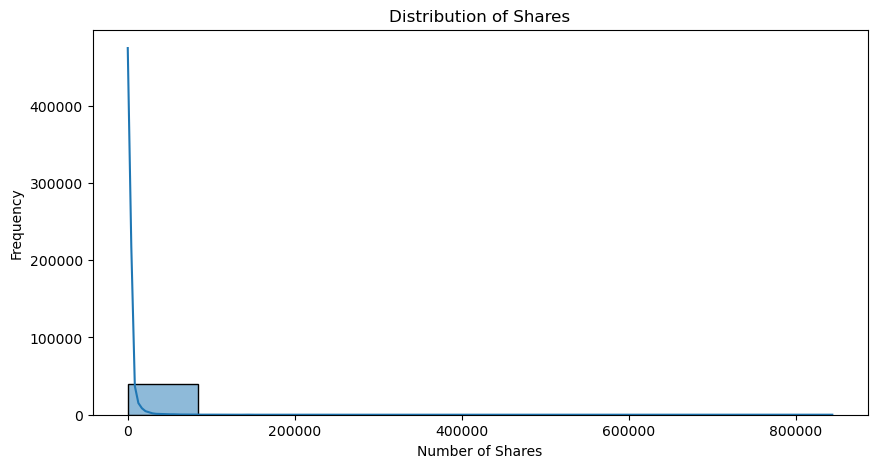

In [151]:
plt.figure(figsize=(10, 5))
sns.histplot(df[' shares'], bins=10, kde=True)
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Shares')
plt.show()

### Visualize the correlations

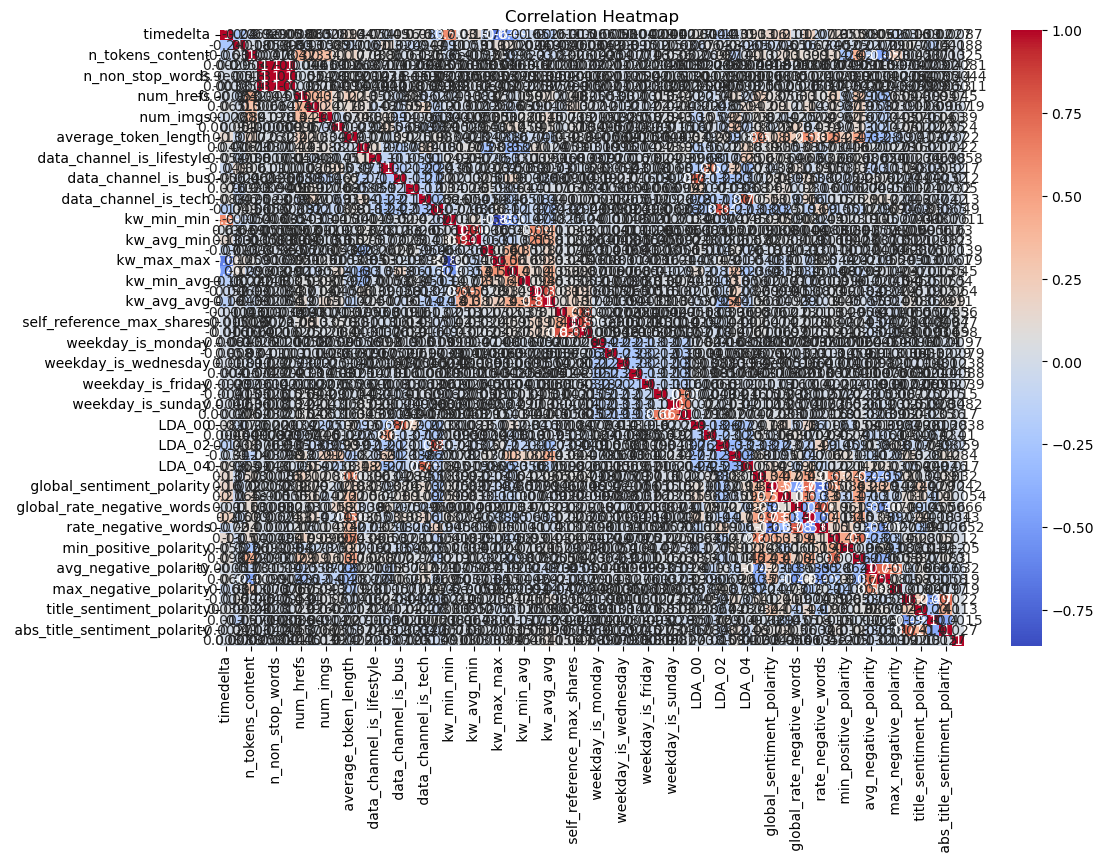

In [152]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## hypothesis tests

In [153]:
categories = df[" num_keywords"].unique()
category_means = []
for category in categories:
    category_data = df[df[" num_keywords"] == category][" shares"]
    category_mean = np.mean(category_data)
    category_means.append(category_mean)

### Example 1: Pearson's correlation coefficient

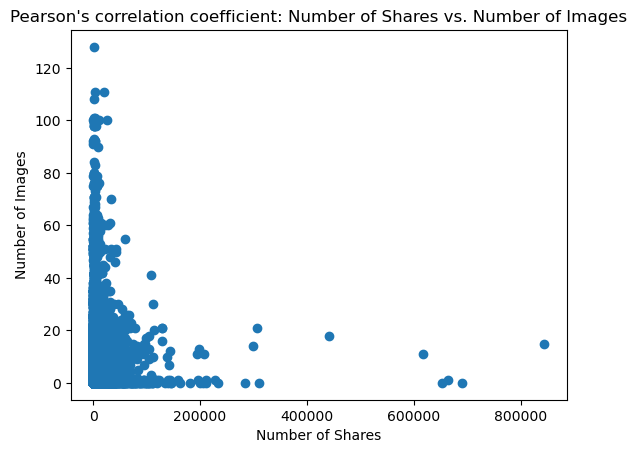

In [154]:
corr_coeff, p_value = stats.pearsonr(df[' shares'], df[' num_imgs'])

plt.scatter(df[' shares'], df[' num_imgs'])
plt.xlabel('Number of Shares')
plt.ylabel('Number of Images')
plt.title("Pearson's correlation coefficient: Number of Shares vs. Number of Images")
plt.show()

### Example 2


Pearson's correlation coefficient:
Correlation coefficient: 0.002458984345090837
p-value: 0.6244249147493814


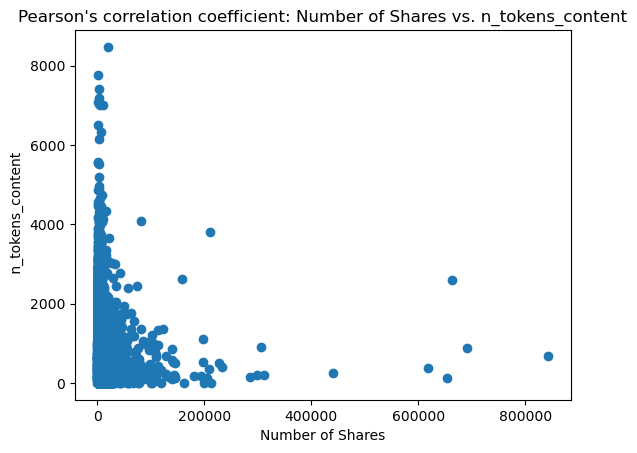

In [155]:
corr_coef, p_value = stats.pearsonr(df[" n_tokens_content"], df[" shares"])
print("Pearson's correlation coefficient:")
print("Correlation coefficient:", corr_coef)
print("p-value:", p_value)

plt.scatter(df[' shares'], df[' n_tokens_content'])
plt.xlabel('Number of Shares')
plt.ylabel(' n_tokens_content')
plt.title("Pearson's correlation coefficient: Number of Shares vs. n_tokens_content")
plt.show()

### Example3

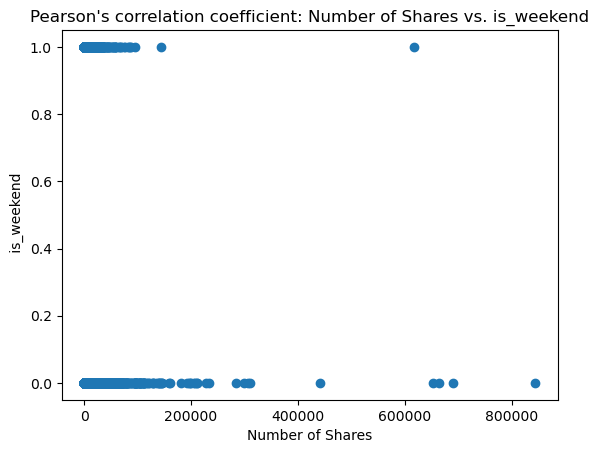

In [156]:
weekday_data = df[df[" is_weekend"] == 1][" shares"]
weekend_data = df[df[" is_weekend"] == 0][" shares"]

plt.scatter(df[' shares'], df[' is_weekend'])
plt.xlabel('Number of Shares')
plt.ylabel(' is_weekend')
plt.title("Pearson's correlation coefficient: Number of Shares vs. is_weekend")
plt.show()

### Example4: Independent t-test


Independent t-test:
t-statistic: 3.3769109636398387
p-value: 0.0007337519086551708


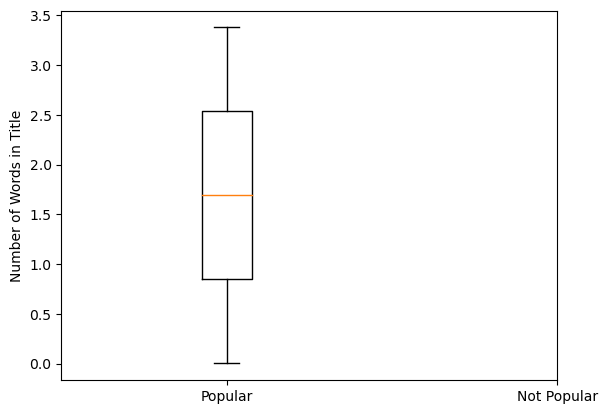

In [157]:
t_stat, p_value = stats.ttest_ind(weekday_data, weekend_data)
print("Independent t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

plt.boxplot([t_stat, p_value])
plt.xticks([1, 2], ['Popular', 'Not Popular'])
plt.ylabel('Number of Words in Title')
plt.show()

### Example5 : One-way ANOVA


One-way ANOVA:
F-statistic: 11.403527656350944
p-value: 0.0007337519086632175


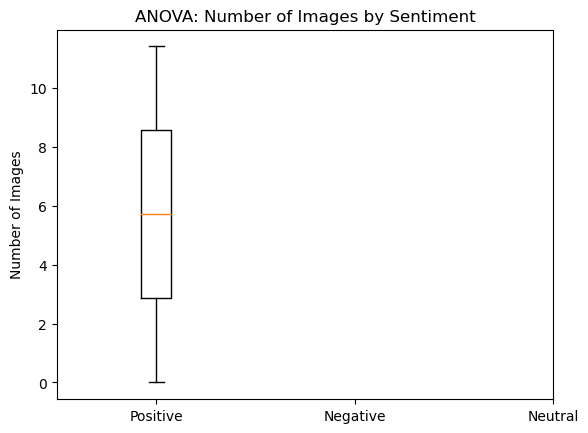

In [158]:
f_stat, p_value = stats.f_oneway(*[df[df[" is_weekend"] == day][" shares"] for day in days_of_week])
print("One-way ANOVA:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

plt.boxplot([f_stat, p_value])
plt.xticks([1, 2, 3], ['Positive', 'Negative', 'Neutral'])
plt.ylabel('Number of Images')
plt.title('ANOVA: Number of Images by Sentiment')
plt.show()

## Extract features and target variable

In [159]:
X = df.iloc[:, 2:-1]  
y = df[' shares']    

## Split the data into training and testing sets

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize and fit a linear regression model

In [161]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Make predictions on the test set

In [162]:
y_pred = regressor.predict(X_test)

## Plot residuals

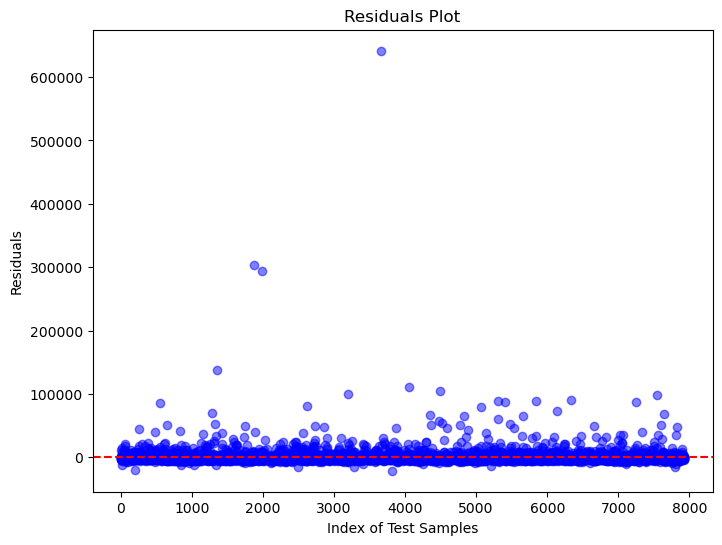

In [163]:
y_residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y_residuals)), y_residuals, c='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Index of Test Samples')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

 ## Evaluate the model

In [164]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) score: ", r2)

Mean Squared Error (MSE):  117512637.2779545
R-squared (R2) score:  0.026180071647273317


## trying Ridge regression

In [165]:
from sklearn.linear_model import Ridge

In [166]:
X = df.iloc[:, 2:-1] 
y = df.iloc[:, -1] 

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
ridge = Ridge(alpha=1.0) 

In [169]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [170]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

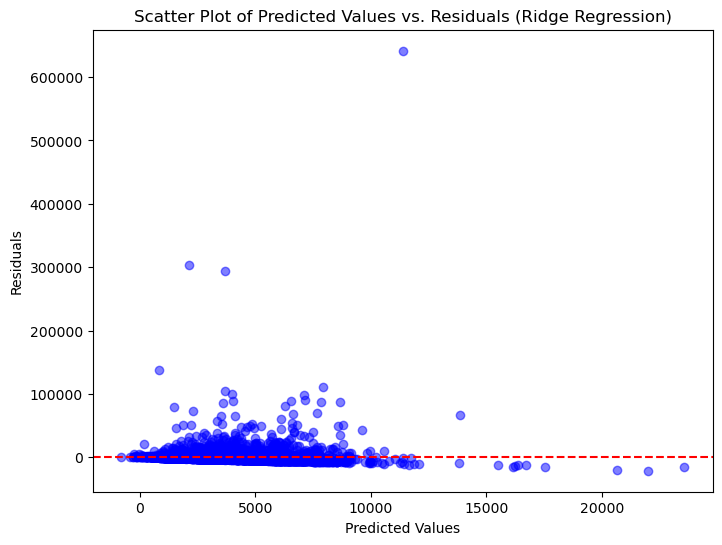

In [171]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_residuals, c='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Predicted Values vs. Residuals (Ridge Regression)')
plt.show()

In [172]:
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 117510282.52369101
R-squared: 0.026199585349639953


## Lasso regression

In [173]:
from sklearn.linear_model import Lasso

In [174]:
X = df.iloc[:, 2:-1]  
y = df.iloc[:, -1]  

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
lasso = Lasso(alpha=1.0)

In [177]:
lasso.fit(X_train, y_train)

C:\Users\katti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.981e+12, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [178]:
# Predict on the testing data
y_pred = lasso.predict(X_test)


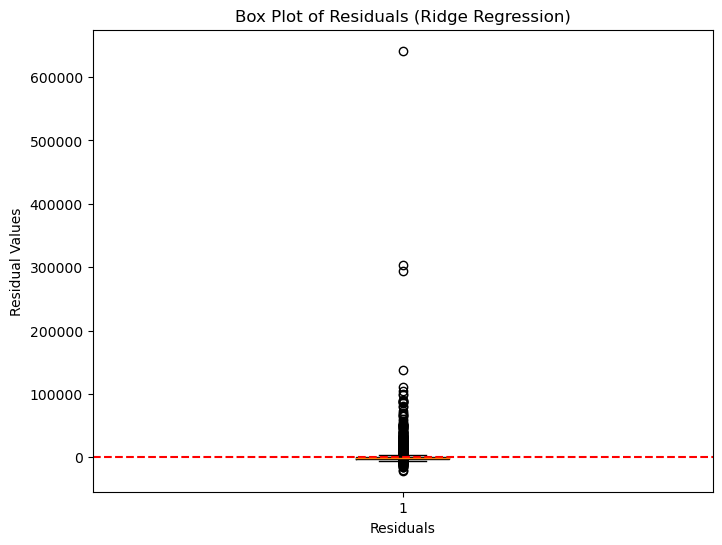

In [179]:
plt.figure(figsize=(8, 6))
plt.boxplot(y_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Residual Values')
plt.title('Box Plot of Residuals (Ridge Regression)')
plt.show()

In [180]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 117535133.31321213
R-squared: 0.025993648399950664


## Using various scaling methods and reporting their effects

In [181]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [182]:
X = df.iloc[:, 2:-1]  
y = df.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)

### Method1 : Min-Max scailing

In [183]:
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [184]:
ridge.fit(X_train_minmax, y_train)
y_pred_minmax = ridge.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
r2_minmax = r2_score(y_test, y_pred_minmax)

### Method2 : Standard Scaling

In [185]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [186]:
ridge.fit(X_train_standard, y_train)
y_pred_standard = ridge.predict(X_test_standard)
mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

### Method3 : Robust Scaling

In [187]:
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(X_train)
X_test_robust = scaler.transform(X_test)

In [188]:
ridge.fit(X_train_robust, y_train)
y_pred_robust = ridge.predict(X_test_robust)
mse_robust = mean_squared_error(y_test, y_pred_robust)
r2_robust = r2_score(y_test, y_pred_robust)


C:\Users\katti\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.37855e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


###  Plot the performance metrics for each scaling method

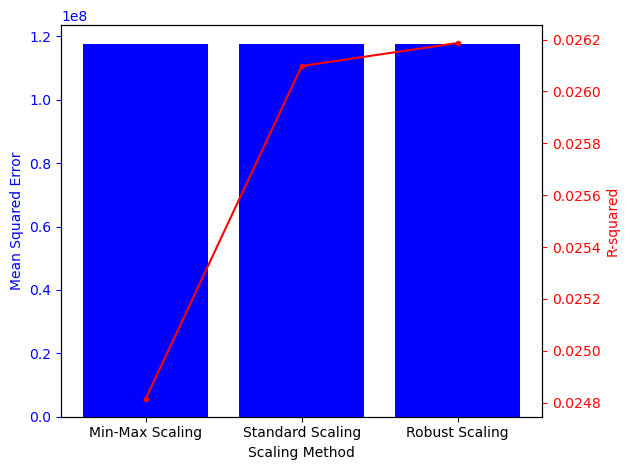

In [189]:
labels = ['Min-Max Scaling', 'Standard Scaling', 'Robust Scaling']
mse_values = [mse_minmax, mse_standard, mse_robust]
r2_values = [r2_minmax, r2_standard, r2_robust]

fig, ax1 = plt.subplots()
ax1.bar(labels, mse_values, color='b')
ax1.set_xlabel('Scaling Method')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(labels, r2_values, 'r.-')
ax2.set_ylabel('R-squared', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

## Adding polynomial features and reporting their effect.

In [190]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

In [191]:
scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standard Scaling': StandardScaler(),
    'Robust Scaling': RobustScaler()
}


In [192]:
polynomial_degrees = [1, 2, 3]

In [193]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [194]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 13681892212.04548


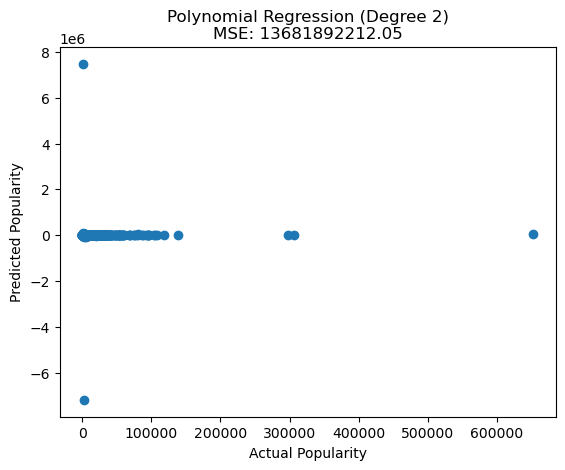

In [195]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title(f'Polynomial Regression (Degree 2)\nMSE: {mse:.2f}')
plt.show()

## using GridSearchCV with RandomizedSearchCV

In [196]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [197]:
model = LinearRegression()


### Define hyperparameter grid for GridSearchCV


In [198]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

### Initialize GridSearchCV


In [199]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

C:\Users\katti\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\katti\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

### Get the best hyperparameters


In [200]:
best_params = grid_search.best_params_


### Initialize the linear regression model with best hyperparameters


In [201]:
best_model = LinearRegression(**best_params)

In [202]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

C:\Users\katti\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [203]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 117512637.27788647
R-squared (R2) Score: 0.02618007164783709


### Initialize the random forest regressor model


In [204]:
rf_model = RandomForestRegressor()

### Define hyperparameter distribution for RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

### Forward Feature Selection Algorithm

In [206]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = []

while len(selected_features) < X.shape[1]:
    best_feature = None
    best_mse = float('inf')
    
    # Iterate over features
    for feature in X.columns:
        if feature not in selected_features:
            features = list(selected_features) + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]
            model = LinearRegression()
            model.fit(X_train_selected, y_train)
            
            y_val_pred = model.predict(X_val_selected)
            mse = mean_squared_error(y_val, y_val_pred)
            
            # Update best feature if necessary
            if mse < best_mse:
                best_feature = feature
                best_mse = mse
    
    # Add the best feature to the set of selected features
    selected_features.append(best_feature)
    print(f'Selected Feature: {best_feature}, MSE: {best_mse}')

# Choose final feature subset
final_feature_subset = selected_features[:-1]  # Remove last feature added as it resulted in the worst performance

X_train_final = X_train[final_feature_subset]
X_val_final = X_val[final_feature_subset]
model_final = LinearRegression()
model_final.fit(X_train_final, y_train)
y_val_pred_final = model_final.predict(X_val_final)
mse_final = mean_squared_error(y_val, y_val_pred_final)


print(f'Final Feature Subset: {final_feature_subset}')
print(f'Validation MSE with Final Model: {mse_final}')


Selected Feature:  kw_avg_avg, MSE: 118776338.47827263
Selected Feature:  self_reference_min_shares, MSE: 118021080.52715416
Selected Feature:  kw_max_avg, MSE: 117804286.340973
Selected Feature:  kw_min_avg, MSE: 117620706.78052625
Selected Feature:  avg_negative_polarity, MSE: 117477708.21146923
Selected Feature:  kw_min_min, MSE: 117359081.89238307
Selected Feature:  data_channel_is_entertainment, MSE: 117302450.07584058
Selected Feature:  num_imgs, MSE: 117244209.7452512
Selected Feature:  average_token_length, MSE: 117186308.0129393
Selected Feature:  weekday_is_monday, MSE: 117149124.3436251
Selected Feature:  num_hrefs, MSE: 117121701.54850794
Selected Feature:  num_self_hrefs, MSE: 117106002.5922867
Selected Feature:  data_channel_is_lifestyle, MSE: 117089790.78590915
Selected Feature:  is_weekend, MSE: 117076789.21722083
Selected Feature:  min_positive_polarity, MSE: 117067638.92630996
Selected Feature:  kw_min_max, MSE: 117059220.37978955
Selected Feature:  title_sentiment_po

### Forward Feature Selection Algorithm

In [208]:
selected_features = set(X.columns)

# Backward feature selection
mse_vals = []
while len(selected_features) > 1:
    best_feature = None
    best_mse = float('inf')
    
    # Iterate over features
    for feature in selected_features:
        # Remove the feature from the set of selected features
        features = list(selected_features - set([feature]))
        X_train_selected = X_train[features]
        X_val_selected = X_val[features]
        model = LinearRegression()
        model.fit(X_train_selected, y_train)
        
        y_val_pred = model.predict(X_val_selected)
        mse = mean_squared_error(y_val, y_val_pred)
        
        if mse < best_mse:
            best_feature = feature
            best_mse = mse
    
    # Remove the best feature from the set of selected features
    selected_features.remove(best_feature)
    mse_vals.append(best_mse)

final_feature_subset = list(selected_features)
X_train_final = X_train[final_feature_subset]
X_val_final = X_val[final_feature_subset]
model_final = LinearRegression()
model_final.fit(X_train_final, y_train)
y_val_pred_final = model_final.predict(X_val_final)
mse_final = mean_squared_error(y_val, y_val_pred_final)

# Evaluate final model performance on the test set
X_test = ...  # Load and preprocess the test set
y_test = ...  # Load the target variable for the test set

print(f'Final Feature Subset: {final_feature_subset}')
print(f'Validation MSE with Final Model: {mse_final}')

Final Feature Subset: [' kw_avg_avg']
Validation MSE with Final Model: 118776338.47827263


##  implemention of different loss functions

### 1- Absolute Error loss funnction (MAE)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Define the absolute error (L1) loss function


In [212]:
def absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

mae = absolute_error(y_val, y_val_pred)
print(f'Mean Absolute Error: {mae}')

mae_sklearn = mean_absolute_error(y_val, y_val_pred)

Mean Absolute Error: 2999.186075775858


### 2- Epsilon-sensetive error

### Define the epsilon-sensitive error loss function

In [215]:
def epsilon_sensitive_error(y_true, y_pred, epsilon=0.1):
    errors = np.maximum(0, np.abs(y_true - y_pred) - epsilon)
    return np.mean(errors)

model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

epsilon = 0.1 # Set the value of epsilon
ese = epsilon_sensitive_error(y_val, y_val_pred, epsilon)
print(f'Epsilon-Sensitive Error (epsilon={epsilon}): {ese}')

mae_sklearn = mean_absolute_error(y_val, y_val_pred)
print(f'Mean Absolute Error (from sklearn): {mae_sklearn}')

Epsilon-Sensitive Error (epsilon=0.1): 2999.08607577583
Mean Absolute Error (from sklearn): 2999.186075775861


### 3- Huber error

### Define the Huber error loss function


In [214]:
def huber_error(y_true, y_pred, delta=1.0):
    errors = np.abs(y_true - y_pred)
    mask = errors <= delta
    squared_errors = np.where(mask, 0.5 * np.square(errors), delta * (errors - 0.5 * delta))
    return np.mean(squared_errors)

model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

delta = 1.0 # Set the value of delta
huber = huber_error(y_val, y_val_pred, delta)
print(f'Huber Error (delta={delta}): {huber}')

mae_sklearn = mean_absolute_error(y_val, y_val_pred)
print(f'Mean Absolute Error (from sklearn): {mae_sklearn}')

Huber Error (delta=1.0): 2998.6861374500622
Mean Absolute Error (from sklearn): 2999.186075775861
